In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install pandas
! pip install nltk
! pip install tensorflow


In [ ]:
import pandas as pd

# Define file paths
input_file = '/content/drive/MyDrive/data/test.csv'  # Path to the input CSV file
output_file = '/content/drive/MyDrive/data/es_test.csv'  # Path to save the filtered file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Filter the DataFrame to include only rows where the 'language' column equals 'es'
filtered_df = df[df['language'] == 'es']

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file, index=False)

print(f"Filtered rows have been saved to {output_file}")

Filtered rows have been saved to /content/drive/MyDrive/data/es_test.csv


In [ ]:
import pandas as pd

# Define file paths
input_file = '/content/drive/MyDrive/data/train.csv'  # Path to the input CSV file
output_file = '/content/drive/MyDrive/data/es_train.csv'  # Path to save the filtered file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Filter the DataFrame to include only rows where the 'language' column equals 'es'
filtered_df = df[df['language'] == 'es']

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file, index=False)

print(f"Filtered rows have been saved to {output_file}")


Filtered rows have been saved to /content/drive/MyDrive/data/es_train.csv


In [ ]:
import pandas as pd

# Define file paths
input_file = '/content/drive/MyDrive/data/validation.csv'  # Path to the input CSV file
output_file = '/content/drive/MyDrive/data/es_validation.csv'  # Path to save the filtered file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Filter the DataFrame to include only rows where the 'language' column equals 'es'
filtered_df = df[df['language'] == 'es']

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv(output_file, index=False)

print(f"Filtered rows have been saved to {output_file}")

Filtered rows have been saved to /content/drive/MyDrive/data/es_validation.csv


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load Spanish stopwords
spanish_stopwords = set(stopwords.words('spanish'))

# Step 1: Preprocessing function
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-záéíóúüñ ]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in spanish_stopwords]
    return ' '.join(filtered_words)

# Step 2: Preprocess function for a given file
def preprocess_file(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Preprocess review_title and review_body
    df['cleaned_review_title'] = df['review_title'].apply(clean_text)
    df['cleaned_review_body'] = df['review_body'].apply(clean_text)

    # Combine cleaned_review_title and cleaned_review_body
    df['combined_cleaned_review'] = df['cleaned_review_title'] + " " + df['cleaned_review_body']

    return df

# Step 3: Preprocess each dataset (train, validation, test)
train_file = '/content/drive/MyDrive/data/es_train.csv'
validation_file = '/content/drive/MyDrive/data/es_validation.csv'
test_file = '/content/drive/MyDrive/data/es_test.csv'

# Preprocess the datasets
train_df = preprocess_file(train_file)
validation_df = preprocess_file(validation_file)
test_df = preprocess_file(test_file)

# Save the preprocessed datasets
train_df.to_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_train.csv', index=False)
validation_df.to_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_validation.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_test.csv', index=False)

print("Preprocessing completed. Preprocessed files saved.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessing completed. Preprocessed files saved.


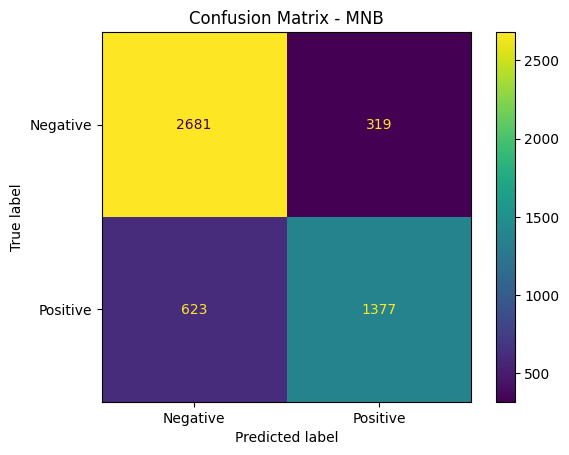

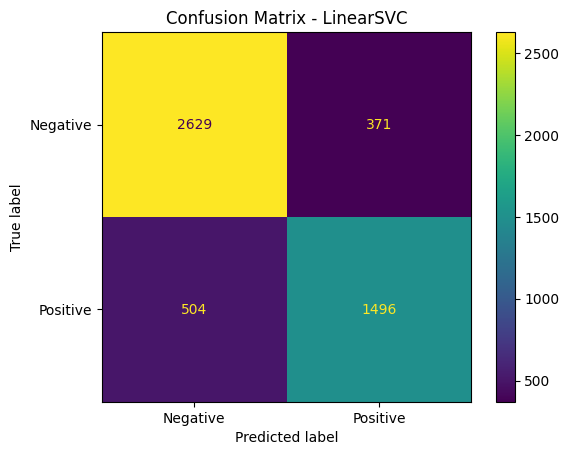

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1282/1282 ━━━━━━━━━━━━━━━━━━━━ 559s 434ms/step - accuracy: 0.8002 - loss: 0.4347 - val_accuracy: 0.7378 - val_loss: 0.5678
Epoch 2/5
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 564s 436ms/step - accuracy: 0.8240 - loss: 0.3830 - val_accuracy: 0.7185 - val_loss: 0.6089
Epoch 3/5
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 558s 433ms/step - accuracy: 0.8295 - loss: 0.3758 - val_accuracy: 0.7184 - val_loss: 0.5868
Epoch 4/5
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 566s 436ms/step - accuracy: 0.8289 - loss: 0.3730 - val_accuracy: 0.7542 - val_loss: 0.5547
Epoch 5/5
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 560s 434ms/step - accuracy: 0.8329 - loss: 0.3678 - val_accuracy: 0.7391 - val_loss: 0.5447
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9188 - loss: 0.2132
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step


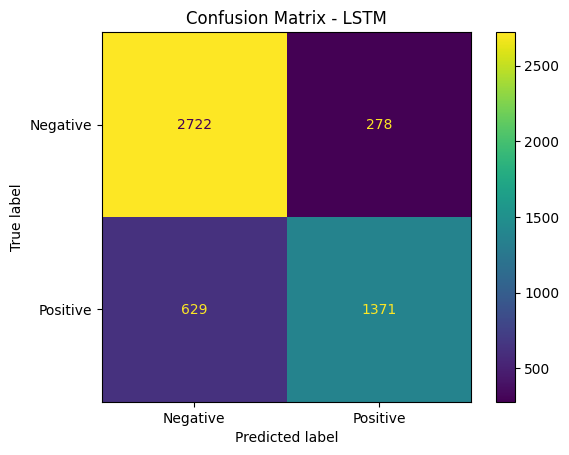

       Model  Accuracy  Precision  Recall  F1 Score       AUC
0        MNB    0.8116   0.811910  0.6885  0.745130  0.886281
1  LinearSVC    0.8250   0.801285  0.7480  0.773726       NaN
2       LSTM    0.8186   0.831413  0.6855  0.751439  0.904760


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load preprocessed datasets
train_df = pd.read_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_train.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_validation.csv')
test_df = pd.read_csv('/content/drive/MyDrive/data/preprocessed/preprocessed_test.csv')

# Combine train and validation datasets for training
combined_train_df = pd.concat([train_df, validation_df])

# Extract features and labels
X_train = combined_train_df['combined_cleaned_review']
y_train = combined_train_df['stars']  # Assuming the 'stars' column exists
X_test = test_df['combined_cleaned_review']
y_test = test_df['stars']

# Map ratings to binary sentiment
y_train = y_train.map(lambda rating: 1 if rating >= 4 else 0)
y_test = y_test.map(lambda rating: 1 if rating >= 4 else 0)

# Store model metrics
model_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC': []}

# 1. Multinomial Naive Bayes (MNB)
# TF-IDF Vectorization limited to 100 features
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Train and evaluate MNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb_model.predict(X_test_tfidf)
y_pred_proba_mnb = mnb_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate metrics
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
mnb_precision = precision_score(y_test, y_pred_mnb)
mnb_recall = recall_score(y_test, y_pred_mnb)
mnb_f1 = f1_score(y_test, y_pred_mnb)
mnb_auc = roc_auc_score(y_test, y_pred_proba_mnb)

# Store metrics
model_metrics['Model'].append('MNB')
model_metrics['Accuracy'].append(mnb_accuracy)
model_metrics['Precision'].append(mnb_precision)
model_metrics['Recall'].append(mnb_recall)
model_metrics['F1 Score'].append(mnb_f1)
model_metrics['AUC'].append(mnb_auc)

# Confusion Matrix for MNB
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
ConfusionMatrixDisplay(cm_mnb, display_labels=['Negative', 'Positive']).plot()
plt.title('Confusion Matrix - MNB')
plt.show()

# 2. Linear Support Vector Machine (LinearSVC)
# Use the more efficient LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Store metrics
model_metrics['Model'].append('LinearSVC')
model_metrics['Accuracy'].append(svm_accuracy)
model_metrics['Precision'].append(svm_precision)
model_metrics['Recall'].append(svm_recall)
model_metrics['F1 Score'].append(svm_f1)
model_metrics['AUC'].append(None)  # AUC not available for LinearSVC

# Confusion Matrix for LinearSVC
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=['Negative', 'Positive']).plot()
plt.title('Confusion Matrix - LinearSVC')
plt.show()

# 3. Long Short-Term Memory (LSTM)
# Tokenization and Padding limited to 500 features
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

# Convert labels to categorical
y_train_lstm = to_categorical(y_train, num_classes=2)
y_test_lstm = to_categorical(y_test, num_classes=2)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=500, output_dim=128, input_length=100))  # Adjusted to 500 words
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_seq, y_train_lstm, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test_lstm)
y_pred_proba_lstm = lstm_model.predict(X_test_seq)[:, 1]
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

# Calculate metrics
lstm_precision = precision_score(y_test, y_pred_lstm)
lstm_recall = recall_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm)
lstm_auc = roc_auc_score(y_test, y_pred_proba_lstm)

# Store metrics
model_metrics['Model'].append('LSTM')
model_metrics['Accuracy'].append(lstm_accuracy)
model_metrics['Precision'].append(lstm_precision)
model_metrics['Recall'].append(lstm_recall)
model_metrics['F1 Score'].append(lstm_f1)
model_metrics['AUC'].append(lstm_auc)

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
ConfusionMatrixDisplay(cm_lstm, display_labels=['Negative', 'Positive']).plot()
plt.title('Confusion Matrix - LSTM')
plt.show()

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display metrics as a table
print(metrics_df)

# Save metrics to a CSV file
metrics_df.to_csv('model_metrics.csv', index=False)